## Linear Regression with Covid Data

The New York Times Covid-19 Database is 
a county-level database of confirmed cases and deaths, 
compiled from state and local governments and health departments across the United States.
The initial release of the database was on Thursday, March 26, 2020, and it is updated daily. 

The data are publically available via GitHub: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).  In this problem we will only use the data aggregated across states.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the data

First, read the whole dataset including the accumulated cases and deaths for each state for each day.

In [2]:
covid_table = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid_table = covid_table.drop('fips', axis=1)
covid_table.tail(10)

,date,state,cases,deaths
52972,2022-10-14,Tennessee,2291224,27717
52973,2022-10-14,Texas,7909316,91224
52974,2022-10-14,Utah,1041933,5034
52975,2022-10-14,Vermont,143683,732
52976,2022-10-14,Virgin Islands,23240,123
52977,2022-10-14,Virginia,2102929,22032
52978,2022-10-14,Washington,1827975,14485
52979,2022-10-14,West Virginia,604108,7470
52980,2022-10-14,Wisconsin,1880837,15352
52981,2022-10-14,Wyoming,177635,1904


### Aggregate data across states

We can merge data from different states to get the total number of cases and deaths for the country. Here we also show an example of visualizing the data.

In [3]:
merged_data = covid_table.drop('state', axis=1)
merged_data = merged_data.groupby('date').sum()
merged_data.tail(10)

,cases,deaths
date,,
2022-10-05,96328933,1057185
2022-10-06,96402681,1057889
2022-10-07,96437335,1058206
2022-10-08,96441582,1058242
2022-10-09,96447636,1058245
2022-10-10,96471883,1058408
2022-10-11,96522454,1059005
2022-10-12,96596469,1059792
2022-10-13,96671641,1060430


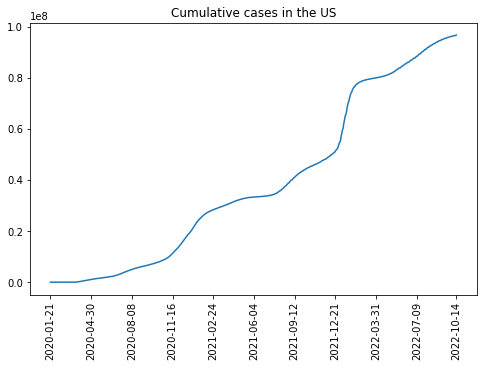

In [4]:
new_cases = np.diff(merged_data['cases'])
dates = np.array(merged_data['cases'].index)
plt.figure(figsize=(8,5))
plt.plot(dates, merged_data['cases'])
plt.xticks(dates[list(np.arange(0, 1000, 100)) + [len(dates)-1]], rotation=90)
_ = plt.title('Cumulative cases in the US')

Let's call April 1, 2021 to May 1, 2021 Period 1. The following code extracts the cumulative cases, deaths, and days during this period



In [5]:
first_date = '2021-04-01'
last_date = '2021-05-01'
merged_data_period1 = merged_data[(merged_data['cases'].index >= first_date) & 
                                  (merged_data['cases'].index <= last_date)]
merged_data_period1.insert(2,"days",np.arange(len(merged_data_period1))+1)
merged_data_period1.head(10)


,cases,deaths,days
date,,,
2021-04-01,30556079,552618,1
2021-04-02,30624668,553574,2
2021-04-03,30688804,554327,3
2021-04-04,30725627,554599,4
2021-04-05,30802221,555129,5
2021-04-06,30864193,556038,6
2021-04-07,30937283,558609,7
2021-04-08,31017741,559611,8
2021-04-09,31099323,560557,9


Visualize the accumulated cases in period 1. You can use any graph you like, such as line plot, scatter plot, and bar plot. The x-axis should be `days`.



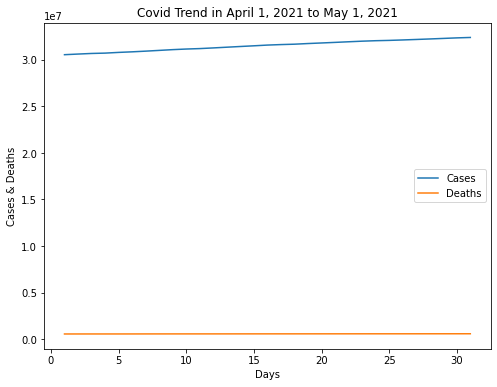

In [6]:
plt.figure(figsize=(8,6))
plt.plot(merged_data_period1.days, merged_data_period1.cases)
plt.plot(merged_data_period1.days, merged_data_period1.deaths)
plt.xlabel('Days')
plt.ylabel('Cases & Deaths')
plt.title('Covid Trend in April 1, 2021 to May 1, 2021')
plt.legend(['Cases', 'Deaths'])
plt.show()

Now, calculate the least-squares estimates of the coefficients for the linear model that includes a slope and an intercept: 

$$\text{cases}_i = \beta_0 + \beta_1 \text{days}_i + \epsilon_i$$

You may either compute these values with explicit expressions, or use a package such as <code>statsmodels.api.OLS</code>. Use our demo from class as an example, if you wish.



In [7]:
import statsmodels.api as sm
x = merged_data_period1.days
y = merged_data_period1.cases
X = sm.add_constant(x)
model = sm.OLS(y, X)
result = model.fit()
beta = [result.params[0], result.params[1]]
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     7761.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           8.81e-37
Time:                        16:19:47   Log-Likelihood:                -367.88
No. Observations:                  31   AIC:                             739.8
Df Residuals:                      29   BIC:                             742.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.052e+07   1.31e+04   2325.884      0.0

Now, plot the data together with the linear fit, shown as a straight line.

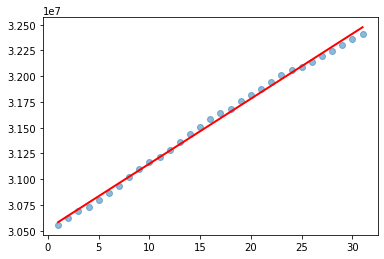

In [8]:
plt.scatter(x, y, alpha=.5)
_ = plt.plot(x, beta[0] + beta[1]*x, color='red', linewidth=2)

Modify the code in 1.1 to fit and visualize a linear regression model for Period 2, July 1, 2021 to August 1, 2021.

In [9]:
first_date = '2021-07-01'
last_date = '2021-08-01'
merged_data_period2 = merged_data[(merged_data['cases'].index >= first_date) & 
                                  (merged_data['cases'].index <= last_date)]
merged_data_period2.insert(2,"days",np.arange(len(merged_data_period2))+1)
merged_data_period2.head(10)


,cases,deaths,days
date,,,
2021-07-01,33704723,604707,1
2021-07-02,33725159,604973,2
2021-07-03,33729152,605059,3
2021-07-04,33732074,605096,4
2021-07-05,33736665,605137,5
2021-07-06,33763742,605454,6
2021-07-07,33793961,605776,7
2021-07-08,33843194,606142,8
2021-07-09,33878529,606549,9


Visualize the data


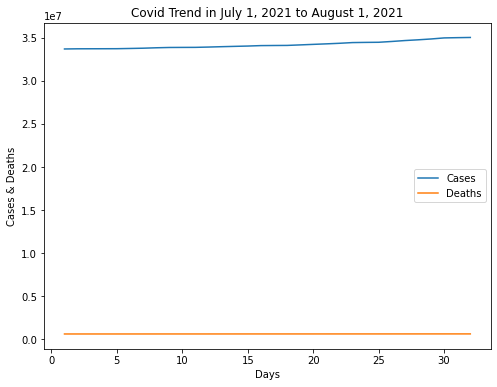

In [10]:
plt.figure(figsize=(8,6))
plt.plot(merged_data_period2.days, merged_data_period2.cases)
plt.plot(merged_data_period2.days, merged_data_period2.deaths)
plt.xlabel('Days')
plt.ylabel('Cases & Deaths')
plt.title('Covid Trend in July 1, 2021 to August 1, 2021')
plt.legend(['Cases', 'Deaths'])
plt.show()

Compute a linear regression

In [11]:
import statsmodels.api as sm
x2 = merged_data_period2.days
y2 = merged_data_period2.cases
X2 = sm.add_constant(x2)
model2 = sm.OLS(y2, X2)
result2 = model2.fit()
beta2 = [result2.params[0], result2.params[1]]
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     465.4
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           8.05e-20
Time:                        16:08:52   Log-Likelihood:                -414.50
No. Observations:                  32   AIC:                             833.0
Df Residuals:                      30   BIC:                             835.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.348e+07   3.82e+04    876.620      0.0

Plot the data together with the linear regression here


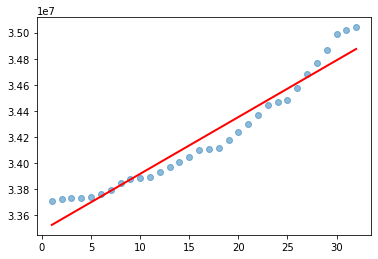

In [12]:
plt.scatter(x2, y2, alpha=.5)
_ = plt.plot(x2, beta2[0] + beta2[1]*x2, color='red', linewidth=2)

Compare the linear regression results for 1.1 and 1.2. In which case does the model better fit the data? Please verify your answer *quantitatively*.

In [274]:
print("R-squared for 1.1: ", result.rsquared)
print("R-squared for 1.2: ", result2.rsquared)
print("As we can see, the R-squared value for 1.1 is higher, we can say that model fits the data better.")
print("It is also clearly evident through the graphs")

R-squared for 1.1:  0.9962773637663771
R-squared for 1.2:  0.9394373293744889
As we can see, the R-squared value for 1.1 is higher, we can say that model fits the data better.
It is also clearly evident through the graphs
